[Google Colab Project](https://colab.research.google.com/drive/1q2mqEoDpS9Uid-hyN1aEM8cqnM-VczWl?usp=sharing)



In [36]:
# Import numpy and matplot
import numpy as np
import matplotlib.pyplot as plt

# KMeans

## Dataset and preprocessing

Text(0.5, 1.0, 'Scaled coordinate from make_blob dataset')

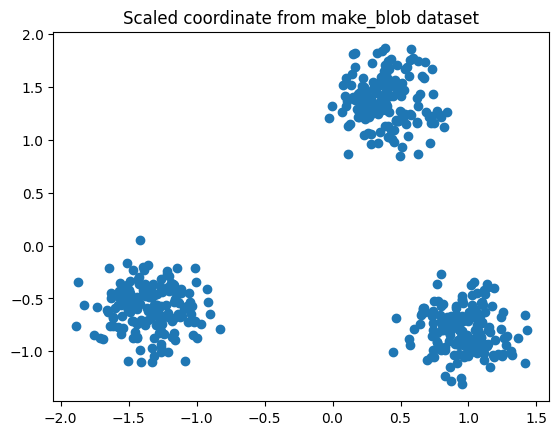

In [37]:
# import sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
n_samples = 500

blobs_coord, blob_classes = make_blobs(n_samples = n_samples, random_state = 2112)

X = blobs_coord.copy()

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X_scaled[:,0], X_scaled[:,1])
ax.set_title("Scaled coordinate from make_blob dataset")

#fig, ax = plt.subplots()
#ax.scatter(blobs_coord[:,0], blobs_coord[:,1])
#ax.set_title("No scaled coordinate from make_blob dataset")


## Model fitting

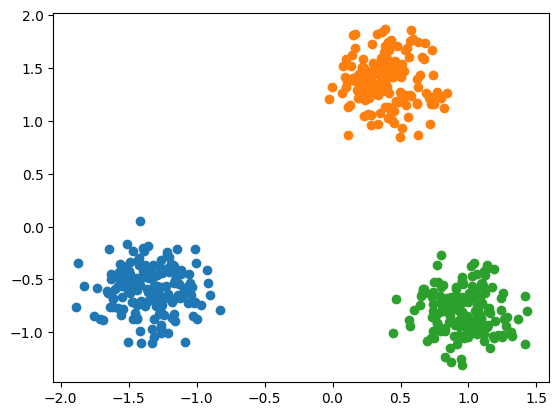

In [38]:
n_clusters = 3
clustering_method = KMeans(n_clusters = n_clusters, init = 'random', n_init = 'auto') # init = {'k-means++', 'random'}
clustering_method.fit(X)
predicted_classes = clustering_method.labels_
unique_labels = np.unique(predicted_classes)
fig, ax = plt.subplots()
for cls in unique_labels:
  class_indices = predicted_classes == cls
  ax.scatter(X_scaled[class_indices, 0], X_scaled[class_indices, 1])


## Evaluation: inertia
Inertia is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.
A **good model** is one with low inertia AND a low number of clusters (K).
Inertia is measured by:



```
clustering_method.inertia_
```



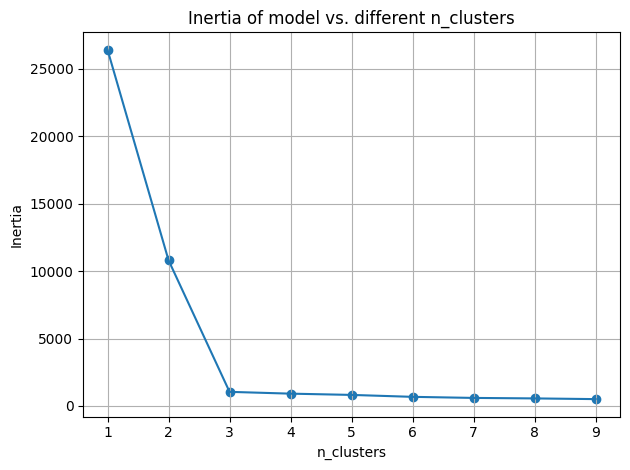

In [39]:
n_clusters_vector = [i for i in range(1,10)]
inertia_vector = []

for n_clusters in n_clusters_vector:
  clustering_method = KMeans(n_clusters = n_clusters, init = 'random', n_init = 'auto') # init = {'k-means++', 'random'}
  clustering_method.fit(X)
  inertia_vector.append(clustering_method.inertia_)

fig, ax = plt.subplots()
ax.plot(n_clusters_vector, inertia_vector)
ax.scatter(n_clusters_vector, inertia_vector)
ax.set_title('Inertia of model vs. different n_clusters')
ax.set_xlabel('n_clusters')
ax.set_ylabel('Inertia')
ax.grid()
fig.tight_layout()
fig.show()

From n_clusters = 3 on the inertia change its slope -> n_clusters = 3 is the best value.

## Evaluation: Mean Silhouette Coefficient

$s = \frac{b - a}{max(b - a)}$

Where:


*   $a$ is the average distance between one data point and all other points in the same cluster

*   $b$ is the  average distance between one data point and all other points in the next nearest cluster


In [40]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X_scaled, predicted_classes))

0.8405614394495962


# Hierarchical clustering

## Dataset and preprocessing

Text(0.5, 1.0, 'Scaled coordinate from make_blob dataset')

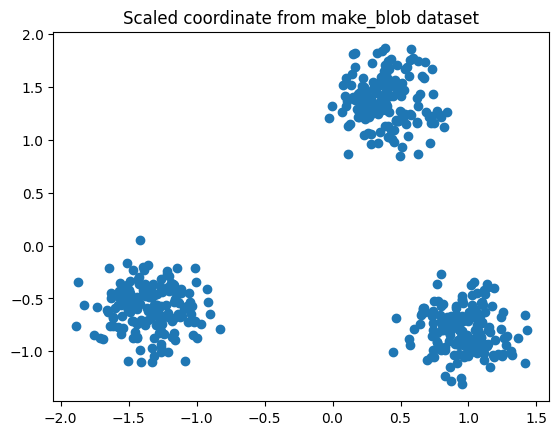

In [41]:
# import sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch

n_samples = 500

blobs_coord, blob_classes = make_blobs(n_samples = n_samples, random_state = 2112)

X = blobs_coord.copy()

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X_scaled[:,0], X_scaled[:,1])
ax.set_title("Scaled coordinate from make_blob dataset")

## Model fitting

## Linkage functions
<img src='https://i0.wp.com/dataaspirant.com/wp-content/uploads/2020/12/15-Hierarchical-Clustering-Linkages.png?resize=609%2C659&ssl=1'>

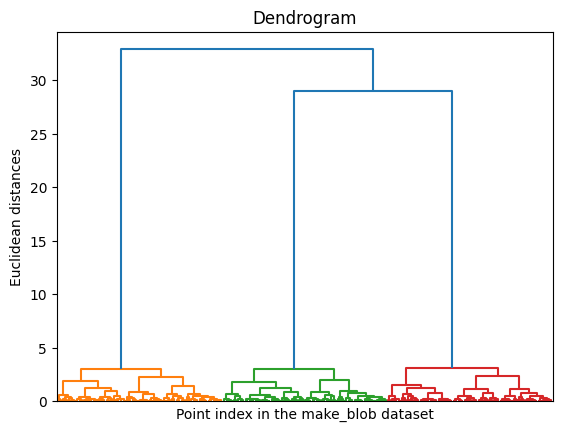

In [42]:
# Using the dendrogram to find the optimal number of clusters
fig, ax = plt.subplots()
linkage_method = sch.linkage(X_scaled, method = 'ward', metric = 'euclidean') # method = {'single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward'}
dendrogram = sch.dendrogram(linkage_method, ax = ax)
ax.set_title('Dendrogram')
ax.set_xlabel('Point index in the make_blob dataset')
ax.set_ylabel('Euclidean distances')
ax.set_xticks([])
plt.show()


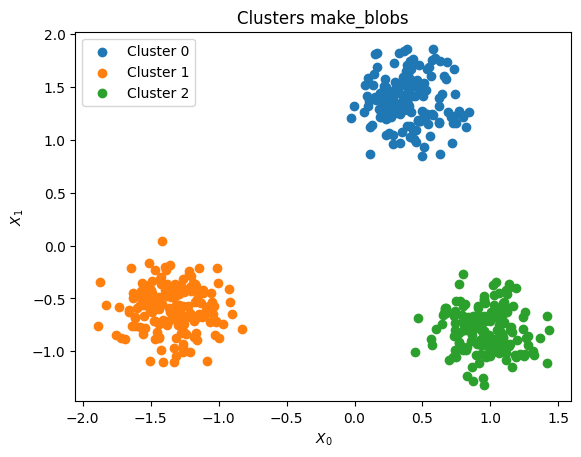

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchy_model = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_predicted = hierarchy_model.fit_predict(X)

fig, ax = plt.subplots()
unique_labels = np.unique(y_predicted)

# Visualising the clusters
for cls in unique_labels:
  ax.scatter(X_scaled[y_predicted == cls, 0], X_scaled[y_predicted == cls, 1], label = f'Cluster {cls}')

ax.set_title('Clusters make_blobs')
ax.set_xlabel(r'$X_0$')
ax.set_ylabel(r'$X_1$')
ax.legend()
fig.show()

#DBSCAN

## Dataset and preprocessing

make moons!

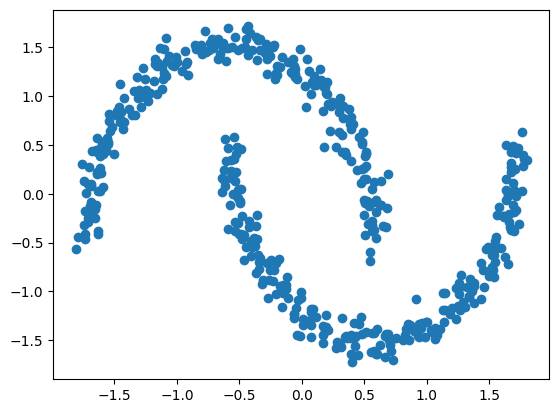

In [45]:
# import sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

n_samples = 500

blobs_coord, blob_classes = make_moons(n_samples=n_samples, noise=0.05, random_state = 5150)

X = blobs_coord.copy()

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X_scaled[:,0], X_scaled[:,1])

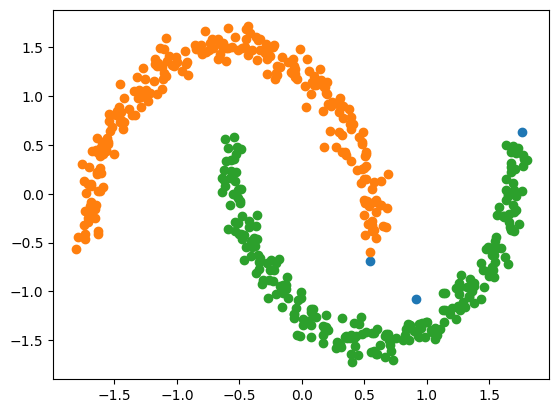

In [49]:
from sklearn.cluster import DBSCAN


clustering_method = DBSCAN(eps = 0.15, min_samples = 5) #eps = 0.5, 0.15
#clustering_method = KMeans(n_clusters = 2, init = 'k-means++', n_init = 'auto')

clustering_method.fit(X_scaled)
predicted_classes = clustering_method.labels_
unique_labels = np.unique(predicted_classes)

fig, ax = plt.subplots()
for cls in unique_labels:
  class_indices = predicted_classes == cls
  ax.scatter(X_scaled[class_indices, 0], X_scaled[class_indices, 1])


This method may be a powerful one if your goal is to deal with outliners and non-linearity.